# How to Scale Numerical Data

In this short tutorial, we will focus on:

1. Why scaling is important
2. Numerical Data Scaling Methods
3. Scaling the Diabetes Dataset
4. Performing `MinMaxScaler` Transform
5. Performing `StandardScaler` Transform

## Why is scaling important

Many machine learning algorithms -- like SVM, Neural Networks, and K-nearest neighbours -- perform better when numerical input variables are scaled to a standard range.

Feature scaling is extremely essential to these models, especially when the range of the features is very different. Otherwise, features with a large range will have a large influence in computing the distance.

The two most popular techniques for scaling numerical data prior to modeling are **normalization** and **standardization**. 

- **Normalization** scales each input variable separately to the range 0-1, which is the range for floating-point values where we have the most precision. 

- **Standardization (or Z-score Normalization)** scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of 0 and a standard deviation of 1.

## Numerical Data Scaling Methods

Both normalization and standardization can be achieved using the scikit-learn library.

### Data Normalization

Normalization is a rescaling of the data from the original range so that all values are within the new range of 0 and 1:


$x_{i_{norm}} = \frac{x_i - min(x)}{max(x) - min(x)}$

- Normalization requires that you know or are able to accurately estimate the minimum and maximum observable values. 
- You may be able to estimate these values from your available data.

You can normalize your dataset using the scikit-learn object `MinMaxScale`. Good practice usage is as follows:

- **Fit the scaler using available training data**. For normalization, this means the training data will be used to estimate the minimum and maximum observable values. This is done by calling the `fit()` function.


- **Apply the scale to training data**. This means you can use the normalized data to train your model. This is done by calling the`transform()` function.

- **Apply the scale to data going forward**. This means you can prepare new data in the future on which you want to make predictions.

If needed, the transform can be inverted. This is useful for converting predictions back into their original scale for reporting or plotting. This can be done by calling the `inverse_transform()` function. 

In [6]:
# Normalization example

from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

# Define Data
data = asarray([[100, 0.001],
       [8, 0.05],
       [50, 0.005],
       [88, 0.07],
       [4, 0.1]])
print(data)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]


In [7]:
# Define Min Max scaler
scaler = MinMaxScaler()

# Transform
scaled = scaler.fit_transform(data)
print(scaled)

[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


Running the example first reports the raw dataset, showing 2 columns with 4 rows. Next, the scaler is defined, fit on the whole dataset and then used to create a transformed version of the dataset with each column normalized independently.

**We can see that the largest raw value for each column now has the value 1.0 and the smallest value for each column now has the value 0.0.**

## Data Standardization

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

$x_{i_{stand}} = \frac{x_i - mean(x)}{std(x)}$

- Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well-behaved mean and standard deviation. 
- You can still standardize your data if this expectation is not met, but you may not get reliable results.
- Standardization requires that you know or are able to accurately estimate the mean and standard deviation of observable values. You may be able to estimate these values from your training data, not the entire dataset.

You can standardize your dataset using the scikit-learn object `StandardScaler`. 

In [10]:
# Standardization Example

from numpy import asarray
from sklearn.preprocessing import StandardScaler

# Define data
data = asarray([[100, 0.001],
       [8, 0.05],
       [50, 0.005],
       [88, 0.07],
       [4, 0.1]])

print(data)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]


In [11]:
# Define Standard Scaler
scaler = StandardScaler()

# Transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]


Running the example first reports the raw dataset, showing 2 columns with 4 rows as before. Next, the scaler is defined, fit on the whole dataset and then used to create a transformed version of the dataset with each column standardized independently. 

**We can see that the mean value in each column is assigned a value of 0.0 if present and the values are centered around 0.0 with values both positive and negative.**


Now, we can introduce a real dataset that provides the basis for applying normalization and standardization transforms as a part of modeling: [Diabetes Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).

## The Diabetes Dataset

This dataset classifies patients data as either an onset of diabetes within five years, and we have used it before:

- [Understand Your Data With Descriptive Statistics](https://github.com/Data-Centric-AI-Community/awesome-python-for-data-science/blob/main/tutorials/data_descriptive_statistics.ipynb)
- [Understand Your Data With Visualization](https://github.com/Data-Centric-AI-Community/awesome-python-for-data-science/blob/main/tutorials/data_basic_visualization.ipynb)
- [Introduction to Missing Data](https://github.com/Data-Centric-AI-Community/awesome-python-for-data-science/blob/main/tutorials/data_preparation/missing_data/missing_data_introduction.ipynb)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('diabetes.csv')
print(dataset.shape)  # summarize the shape of the dataset

(768, 9)


In [17]:
# summarize each variable
print(dataset.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

This confirms the 7 input variables, one output variable, and 768 rows of data. 

**A statistical summary of the input variables is provided show that each variable has a very different scale. This makes it a good dataset for exploring data scaling methods.**

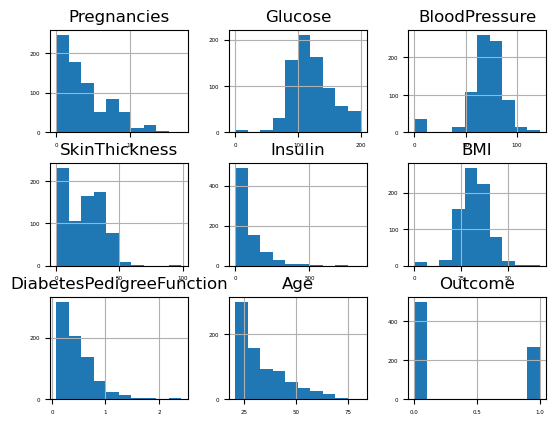

In [23]:
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)

**The plots confirm the differing scale for each input variable and show that the variables have differing scales.**

## MinMaxScaler Transform

We can apply the MinMaxScaler to the diabetes dataset directly to normalize the input variables. We will use the default configuration and scale values to the range 0 and 1. First, a `MinMaxScaler` instance is defined with default hyperparameters. Once defined, we can call the `fit_transform()` function and pass it to our dataset to create a transformed version of our dataset:


In [39]:
from sklearn.preprocessing import MinMaxScaler

# Load the data
dataset = pd.read_csv('diabetes.csv') 

# retrieve just the numeric input values
data = dataset.iloc[:,:-1]

In [40]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [41]:
# perform a robust scaler transform of the dataset
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data)

In [42]:
scaled_data

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

The `fit_transform` method returns a **NumPy array**. If you want to convert it back to a DataFrame and preserve the column names, you can do so like this:

In [46]:
scaled_df = pd.DataFrame(scaled_data, columns=dataset.columns[:-1])

In [47]:
scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [48]:
scaled_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that the distributions have been adjusted and that the **minimum and maximum values for each variable are now 0.0 and 1.0 respectively.**

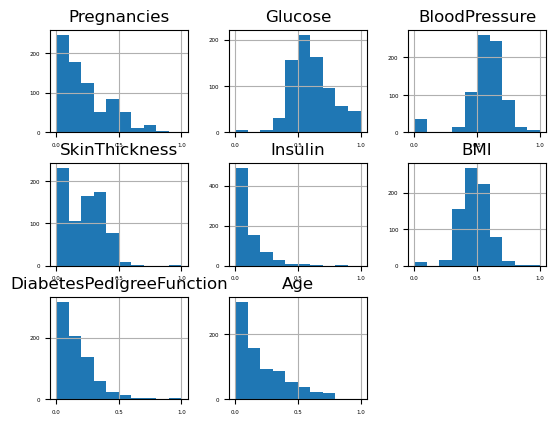

In [50]:
fig = scaled_df.hist(xlabelsize=4, ylabelsize=4)

Histogram plots of the variables are created, although the distributions don’t look much different from their original distributions seen in the previous section. **We can confirm that the minimum and maximum values are now zero and one respectively, as we expected.**

## StandardScaler Transform

We can apply the StandardScaler to the diabetes dataset directly to standardize the input variables. We will use the default configuration and scale values to subtract the mean to center them on 0.0 and divide by the standard deviation to give the standard deviation of 1.0.

In [51]:
from sklearn.preprocessing import StandardScaler

# Load the data
dataset = pd.read_csv('diabetes.csv') 

# retrieve just the numeric input values
data = dataset.iloc[:,:-1]

In [52]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [53]:
# perform a robust scaler transform of the dataset
scaler = StandardScaler()

scaled_data = scaler.fit_transform(data)

In [54]:
scaled_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [55]:
scaled_df = pd.DataFrame(scaled_data, columns=dataset.columns[:-1])

In [56]:
scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [58]:
scaled_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


We can see that the distributions have been adjusted and that the **mean is a very small number close to zero and the standard deviation is very close to 1.0** for each variable.

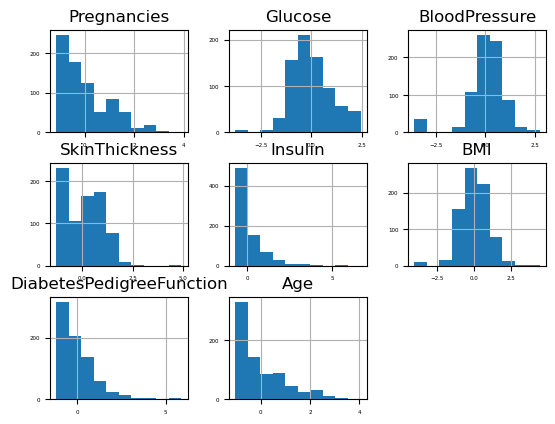

In [61]:
fig = scaled_df.hist(xlabelsize=4, ylabelsize=4)

Histogram plots of the variables are created, although the distributions don’t look much different from their original distributions seen in the previous section other than their scale on the x-axis. We can see that the center of mass for each distribution is centered on zero, which is more obvious for some variables than others.

# What is next?

In the next tutorials, we'll show you how to scale data with outliers and how to encode categorial data.

## 👾 Join our [Discord community](https://tiny.ydata.ai/dcai-community-github) and follow our Code-with-Me sessions to learn more about data science!

### 💻 Would you like to collaborate? Check some of the [topics we have open in GitHub issues](https://github.com/Data-Centric-AI-Community/awesome-python-for-data-science/issues), comment in one and let's get started! You can also drop us a line in the #contributors channel on Discord.